# Explore here

In [122]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import re
from unidecode import unidecode
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from pickle import dump


In [123]:
### DATA ANALYSIS FOR SPAM LINK DETECTION SYSTEM
### SUPPORT VECTOR MACHINE MODEL
# Get sales dataset
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")

# Print the first rows of the dataframe for visualization
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [124]:
df.head().T

,0,1,2,3,4
url,https://briefingday.us8.list-manage.com/unsubs...,https://www.hvper.com/,https://briefingday.com/m/v4n3i4f3,https://briefingday.com/n/20200618/m#commentform,https://briefingday.com/fan
is_spam,True,True,True,False,True


In [125]:
# Shape of the dataframe
df.shape

(2999, 2)

In [126]:
# Summary of the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


In [127]:
# Check if any missing values in the dataframe
df.isna().sum()

url        0
is_spam    0
dtype: int64

There are no missing values in the dataframe.

In [128]:
# Check if duplicate rows in the dataframe
print(f"Duplicate rows: {df.duplicated().sum():.2f}")

Duplicate rows: 630.00


There are 630 duplicate rows in the dataframe.

In [129]:
# Print duplicate rows of the dataframe
print(df[df.duplicated()])

                                                    url  is_spam
60    https://briefingday.us8.list-manage.com/unsubs...     True
61                               https://www.hvper.com/     True
62                   https://briefingday.com/m/v4n3i4f3     True
64                          https://briefingday.com/fan     True
113                         https://briefingday.com/fan     True
...                                                 ...      ...
2971  https://www.cnbc.com/2020/06/29/stock-market-f...    False
2972                      https://thehustle.co/account/     True
2973                              https://thehustle.co/     True
2979               https://www.bloomberg.com/tosv2.html     True
2995                      https://www.youtube.com/watch     True

[630 rows x 2 columns]


In [130]:
# Sort dataframe by "url" column
df_sorted = df.sort_values(by='url')
# Print duplicate rows of the sorted dataframe
print(df_sorted[df_sorted.duplicated()])

                                         url  is_spam
2954              http://gettheelevator.com/     True
2090              http://gettheelevator.com/     True
831               http://gettheelevator.com/     True
2600     http://gettheelevator.com/editorial     True
832      http://gettheelevator.com/editorial     True
...                                      ...      ...
2928  https://www.youtube.com/user/voxdotcom     True
775   https://www.youtube.com/user/voxdotcom     True
2248  https://www.youtube.com/user/voxdotcom     True
1968  https://www.youtube.com/user/voxdotcom     True
2995           https://www.youtube.com/watch     True

[630 rows x 2 columns]


In [131]:
# Eliminate duplicate rows in the dataframe
df = df.drop_duplicates().reset_index(drop = True)
df.shape


(2369, 2)

In [132]:
# Get unique values of "url" column
df.url.value_counts()

url
https://www.bbc.com/news/technology-51018758                                                                                 1
https://www.nytimes.com/2020/07/01/business/economic-recovery-virus-surge.html                                               1
https://www.nytimes.com/2020/07/01/world/europe/putin-referendum-vote-russia.html                                            1
https://www.npr.org/2020/06/30/885188348/russians-are-voting-on-206-reforms-the-most-important-one-will-extend-putins-rul    1
https://apnews.com/c9719e4bd8a398b8e81e49ed5304965e                                                                          1
                                                                                                                            ..
https://briefingday.com/fan                                                                                                  1
https://www.brookings.edu/interactives/reopening-america-and-the-world/                                    

In [133]:
# Description of the variables of the dataframe
df.describe().T

,count,unique,top,freq
url,2369,2369,https://www.bbc.com/news/technology-51018758,1
is_spam,2369,2,False,2125


In [134]:
# Get unique values of "is_spam" column
print(df["is_spam"].value_counts())

is_spam
False    2125
True      244
Name: count, dtype: int64


There are 2125 False values and 244 True values.
There are less urls that are spam (is_spam=True).

<Axes: >

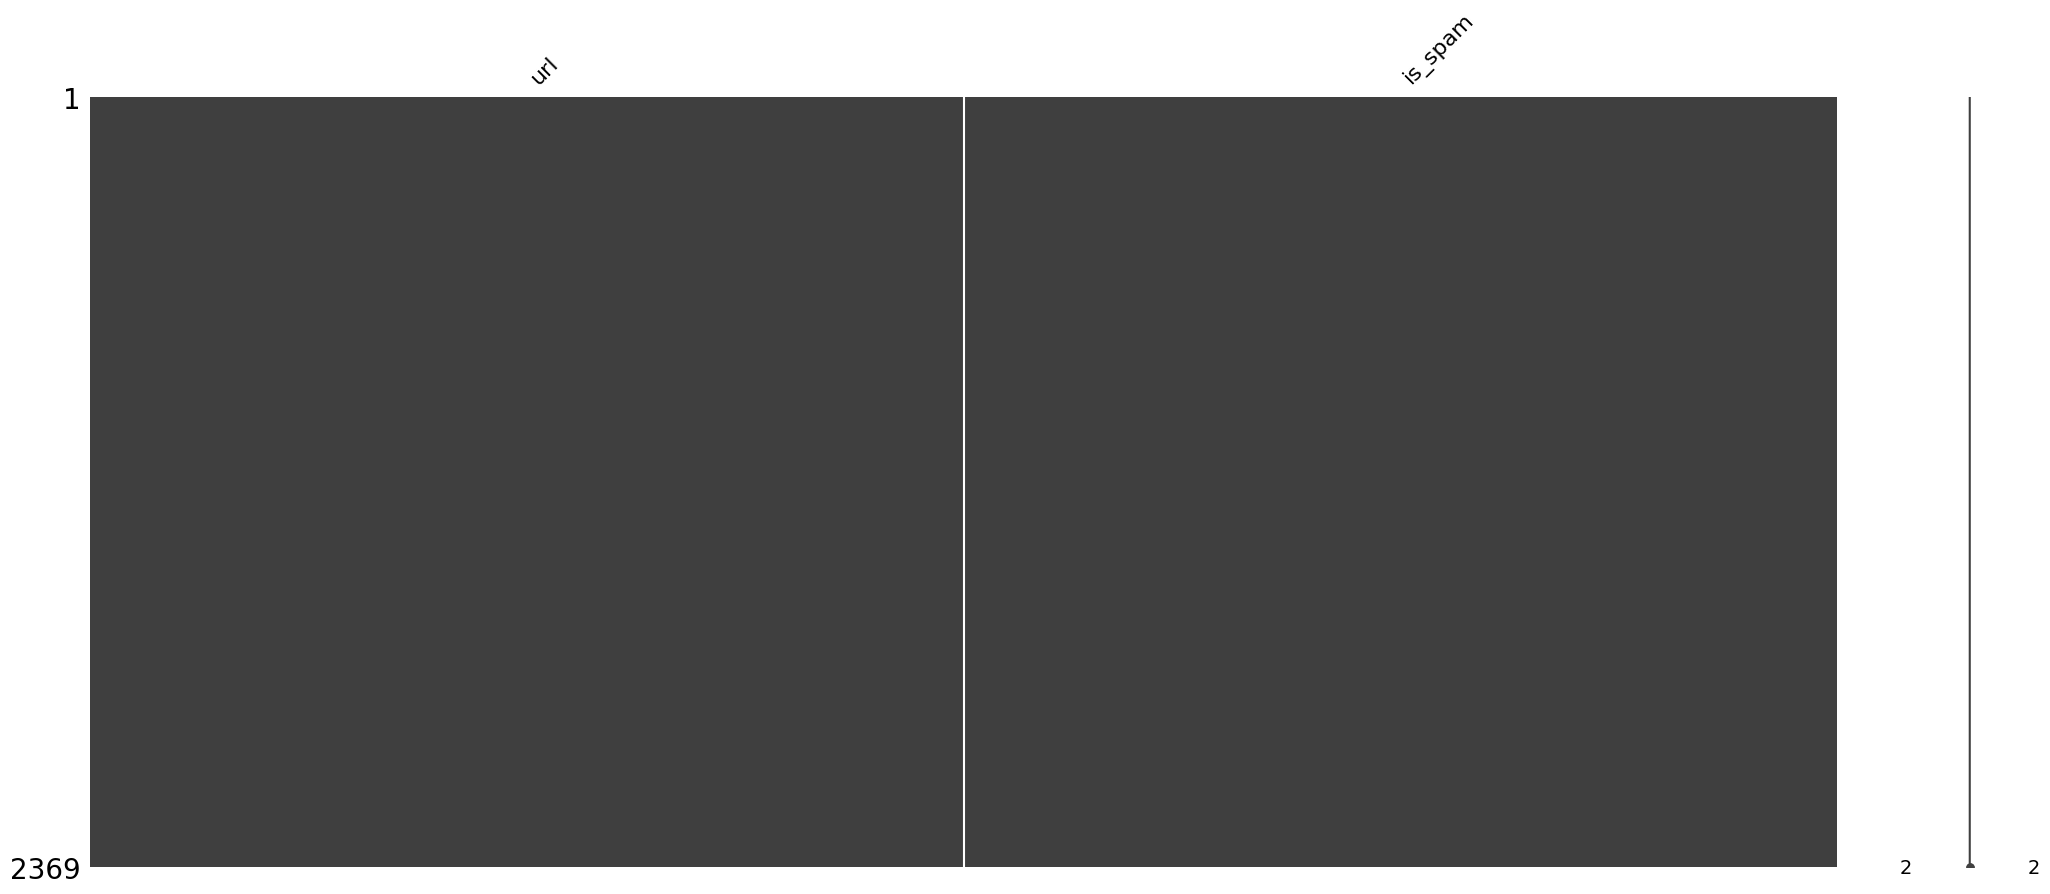

In [135]:
# Visualize missing values in dataframe 
msno.matrix(df)

<Axes: >

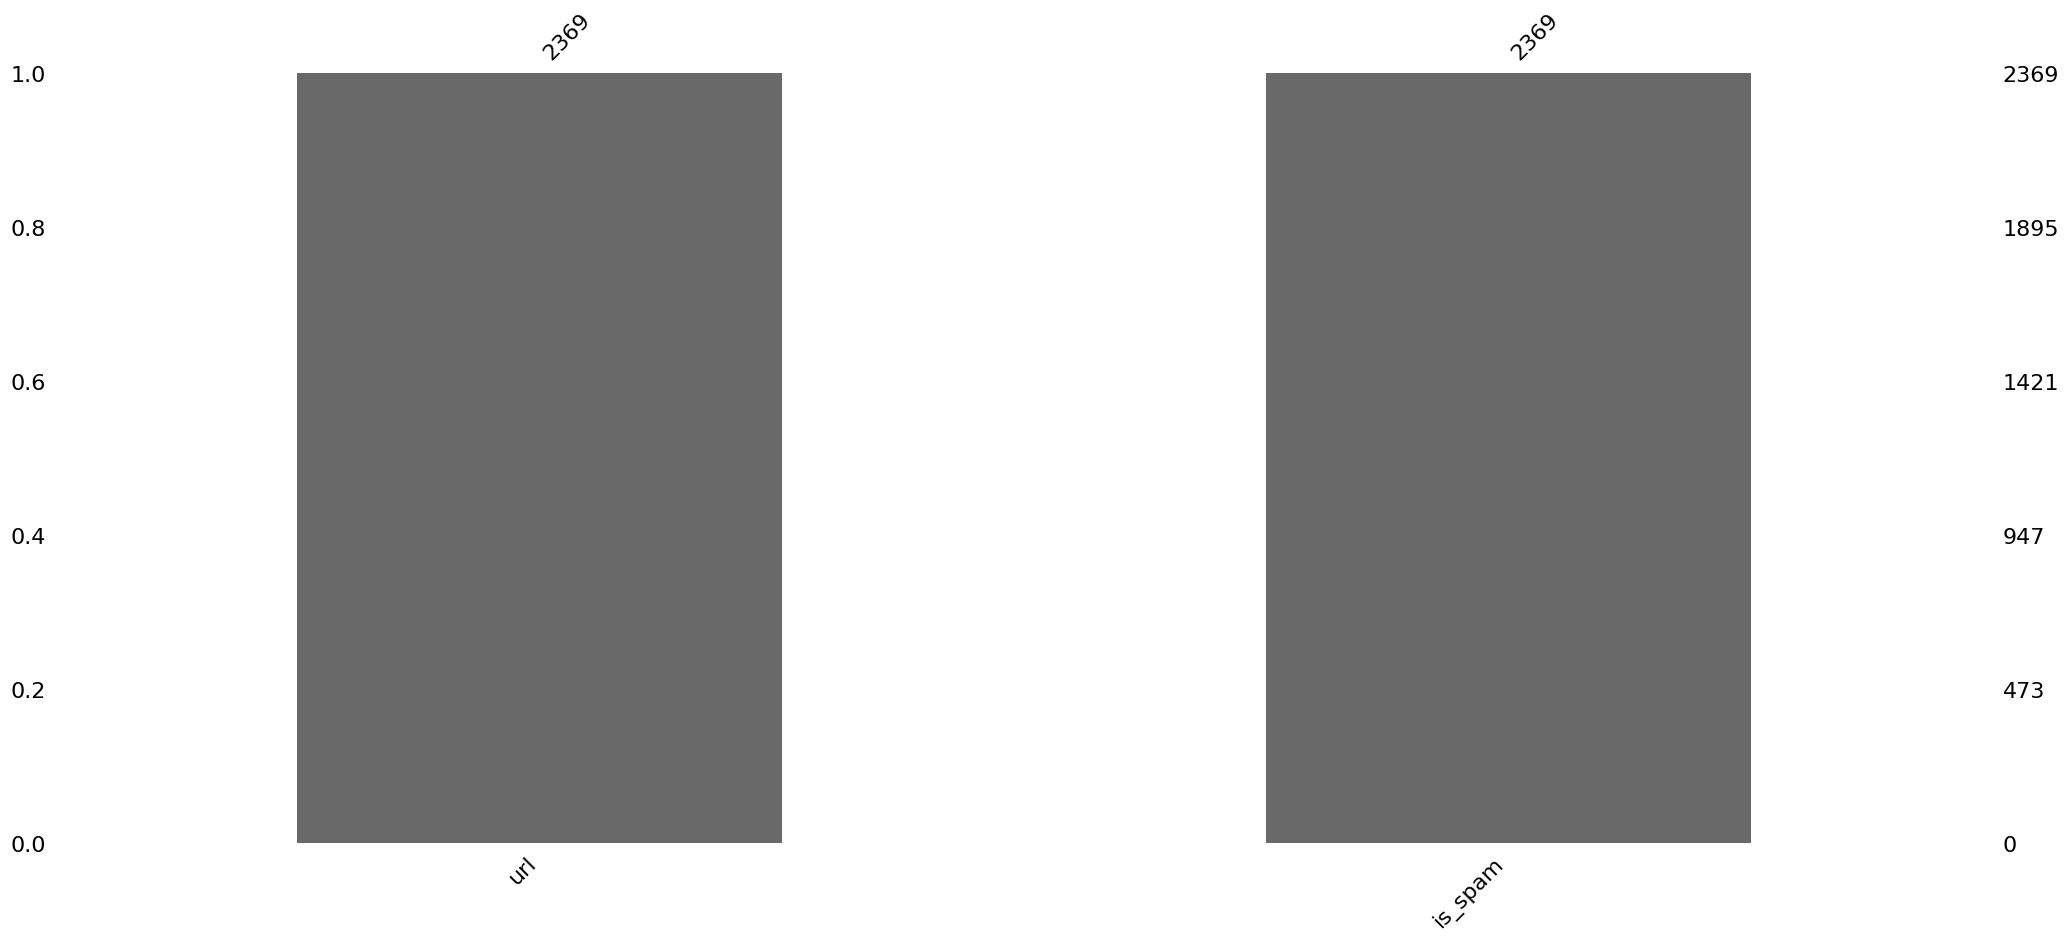

In [136]:
msno.bar(df)


There are no missing values in the dataframe.

In [137]:
# Print the unique values of "url" column
print(df["url"].unique())

['https://briefingday.us8.list-manage.com/unsubscribe'
 'https://www.hvper.com/' 'https://briefingday.com/m/v4n3i4f3' ...
 'https://techcrunch.com/2019/07/04/an-optimistic-view-of-deepfakes/'
 'https://www.technologyreview.com/2019/12/20/131462/this-startup-claims-its-deepfakes-will-protect-your-privacy/'
 'https://www.bbc.com/news/technology-51018758']


In [138]:
nltk.download('punkt_tab')
download("wordnet")
lemmatizer = WordNetLemmatizer()
download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package punkt_tab to /home/vscode/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
# Text preprocessing for "url" column
def preprocess_url(text):
    # Remove https://
    text=re.sub('https://','',text)
    # Text to lower case
    text = text.lower()
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    # Remove additional white spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove the stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Remove the accents
    tokens = [unidecode(token) for token in tokens]
    # Lematizer the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [140]:
# Example of url preprocessing
print(f'First url before text processing:\n {df.loc[0,"url"]}')
print('-'*50)
print(f'First url after text processing:\n {preprocess_url(df.loc[0,"url"])}')

First url before text processing:
 https://briefingday.us8.list-manage.com/unsubscribe
--------------------------------------------------
First url after text processing:
 briefingday u list manage com unsubscribe


In [141]:
# Apply the text preprocessing to all the urls
df["url_prepro"] = df["url"].apply(preprocess_url)
df["url_prepro"].head()

0    briefingday u list manage com unsubscribe
1                                www hvper com
2                        briefingday com v n f
3                briefingday com n commentform
4                          briefingday com fan
Name: url_prepro, dtype: object

In [142]:
# Eliminate the empty urls after text preprocessing
df1 = df[df.url_prepro!='']

In [143]:
df1.head()

,url,is_spam,url_prepro
0,https://briefingday.us8.list-manage.com/unsubs...,True,briefingday u list manage com unsubscribe
1,https://www.hvper.com/,True,www hvper com
2,https://briefingday.com/m/v4n3i4f3,True,briefingday com v n f
3,https://briefingday.com/n/20200618/m#commentform,False,briefingday com n commentform
4,https://briefingday.com/fan,True,briefingday com fan


In [144]:
# Dimensions of dataframe df1
df1.shape

(2369, 3)

In [145]:
# Check if duplicate values in df1
df1.url_prepro.duplicated().sum()

np.int64(69)

There are 69 duplicate urls in df1.

In [146]:
# Eliminate duplicate urls in df1
df1.drop_duplicates(subset='url_prepro', inplace=True)
print(f'The dataset has {df1.shape[0]} urls.')

The dataset has 2300 urls.


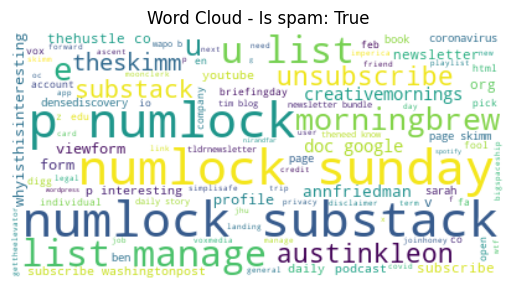

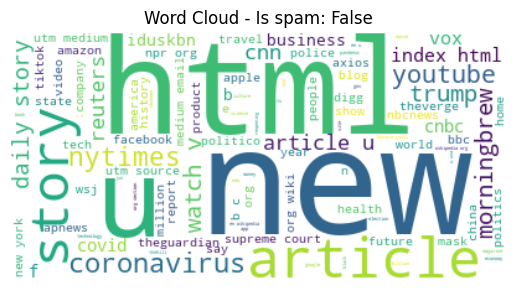

In [147]:
# Create a list of unique values for "is_spam" column
spam_unique = df1['is_spam'].unique()

# Create a WordCloud for each "is_spam" value
for spam_value in spam_unique:
    texts_spam = " ".join(df1[df1['is_spam'] == spam_value]['url_prepro'].tolist())
    wordcloud = WordCloud(background_color="white", max_words=100, contour_color="steelblue", collocations=True)
    wordcloud.generate(texts_spam)
    # Mostrar la nube de palabras para cada partido
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud - Is spam: {spam_value}")
    plt.axis("off")
    plt.show()

In [148]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df1.url_prepro, df1.is_spam, test_size=0.2, random_state=42)

In [149]:
X_train

368     www dupont com product dupont tychem fr rf sv ...
2290                              github com liuliu dflat
359     fivethirtyeight com feature police reform fund...
2209    www thesun co uk news uknews euromillions adri...
2016    doc google com spreadsheet e pacx vsxfcsve xh ...
                              ...                        
1683    rollcall com supreme court allows president fi...
1121    www morningbrew com daily story rising covid c...
1157                         ownyourcontent wordpress com
1325    www morningbrew com daily story future city ut...
881     www cnn com travel article christiania copenha...
Name: url_prepro, Length: 1840, dtype: object

In [150]:
y_train

368     False
2290    False
359     False
2209    False
2016     True
        ...  
1683    False
1121    False
1157     True
1325    False
881     False
Name: is_spam, Length: 1840, dtype: bool

In [151]:
# Convert text data into a TF-IDF matrix
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [152]:
# Print TF-IDF values for X_train converting the TF-IDF matrix to a dataframe
tfidf_df = pd.DataFrame(X_train_vec.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df)

       aa  aaron   ab  abacus  abba  abbott  abc  abcnews  abolish  abortion  \
0     0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
1     0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
2     0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
3     0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
4     0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
...   ...    ...  ...     ...   ...     ...  ...      ...      ...       ...   
1835  0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
1836  0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
1837  0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
1838  0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   
1839  0.0    0.0  0.0     0.0   0.0     0.0  0.0      0.0      0.0       0.0   

      ...  zoo  zoom  zoox  zskl  ztz  

In [153]:
# Support Vector Classifier model for urls
model_SVC = SVC(kernel = "linear", random_state = 42)
model_SVC.fit(X_train_vec, y_train)

SVC(kernel='linear', random_state=42)

In [154]:
# Predict the test data
y_pred = model_SVC.predict(X_test_vec)
y_pred

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [155]:
# Accuracy of the SVC model
print("Accuracy:")
accuracy_score(y_test, y_pred)

Accuracy:


0.8956521739130435

In [156]:
# Optimize the SVC model using GridSearchCV
# Define the hyperparameter range
hyperparams = {
    "C": [100, 200],
    "kernel": ["poly", "precomputed’"],
    "degree": [1, 2, 3],
    "gamma": ["auto"]
}

# Initialize the grid search
grid = GridSearchCV(SVC(), hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100, 200], 'degree': [1, 2, 3],
                         'gamma': ['auto'],
                         'kernel': ['poly', 'precomputed’']},
             scoring='accuracy')

In [157]:
grid.fit(X_train_vec, y_train)
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.local

In [158]:
# Print best estimator after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=100, degree=1, gamma='auto', kernel='poly')


In [159]:
grid_predictions = grid.predict(X_test_vec)
# Print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

       False       0.90      1.00      0.95       416
        True       0.00      0.00      0.00        44

    accuracy                           0.90       460
   macro avg       0.45      0.50      0.47       460
weighted avg       0.82      0.90      0.86       460



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [160]:
# Optimized model
opt_model = SVC(C = 100, degree = 1, gamma = "auto", kernel = "poly", random_state = 42)
opt_model.fit(X_train_vec, y_train)
y_pred2 = opt_model.predict(X_test_vec)
print("Accuracy:")
accuracy_score(y_test, y_pred2)

Accuracy:


0.9043478260869565

The optimized model has a better accuracy than the initial SVC model.

In [161]:
# Save the optimized model
dump(opt_model, open("/workspaces/NLP-project_AR/models/svc_C-100_deg-1_gam-auto_ker-poly_42.sav", "wb"))